In [1]:
!pip install transformers torch pandas
!pip install newspaper3k


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# News

## Load the data

In [3]:
import pandas as pd
news_df = pd.read_csv('tesla_news_collected.csv')
news_df.head()

,source,title,description,text,url,publishedAt
0,Yahoo Entertainment,Ford says its Q1 profit fell by two-thirds and...,NaN,"DEARBORN, Mich. (AP) — Ford Motor Co. says it ...",https://finance.yahoo.com/news/ford-says-q1-pr...,NaN
1,New Zealand Herald,Tesla’s New Zealand revenue crashed in 2024 – ...,NaN,Overall New Zealand new vehicle registrations ...,https://www.nzherald.co.nz/business/tesla-ev-a...,2024-05-07 00:00:00
2,The Star Online,Tesla sales slump in Europe,NaN,"SAN FRANCISCO, May 5 (Xinhua) -- Tesla sales i...",https://www.thestar.com.my/news/world/2025/05/...,2025-05-06 00:00:00
3,Electrek,Tesla Cybertruck inventory skyrockets to recor...,NaN,Tesla’s Cybertruck inventory has skyrocketed t...,http://electrek.co/2025/05/05/tesla-cybertruck...,2025-05-05 00:00:00
4,Japan Today,OpenAI reverses course and says its nonprofit ...,NaN,By MATT O'BRIEN\n\nOpenAI is reversing course ...,https://japantoday.com/category/tech/openai-re...,2025-05-06 05:30:00+09:00


##Text Processing

In [4]:
import re

def clean_text(text):
    text = str(text)
    text = text.encode("ascii", "ignore").decode("utf-8")  # remove non-ascii
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    text = re.sub(r"&amp;", "&", text)  # fix HTML entities
    return text

In [5]:
# Clean full body
news_df["text"] = news_df["text"].apply(clean_text)
news_df["title"] = news_df["title"].apply(clean_text)

In [6]:
# Truncate Long Article
news_df["text"] = news_df["text"].apply(lambda x: x[:3000])

## Load Emotion Detection

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

# Load model
emotion_model_name = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(emotion_model_name)
model = AutoModelForSequenceClassification.from_pretrained(emotion_model_name)

# Emotion labels
labels = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

def detect_emotion(text):
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=1)
        max_idx = torch.argmax(probs, dim=1).item()
        return labels[max_idx]
    except Exception as e:
        print("Error:", e)
        return "unknown"


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

# Run Emotion Detection

In [8]:
news_df["emotion"] = news_df["text"].apply(lambda x: detect_emotion(str(x)[:512]))  # Only first 512 tokens
news_df[["title", "emotion"]]


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

,title,emotion
0,Ford says its Q1 profit fell by two-thirds and...,sadness
1,Teslas New Zealand revenue crashed in 2024 and...,neutral
2,Tesla sales slump in Europe,sadness
3,Tesla Cybertruck inventory skyrockets to recor...,neutral
4,OpenAI reverses course and says its nonprofit ...,neutral
5,Maker of ChatGPT says it will remain under non...,neutral
6,Ford warns Trumps tariffs will cost $2.5 billi...,neutral
7,Palantir (PLTR) Traders Brace for 12% Post-Ear...,neutral
8,Black Leftist Moves to Africa and Discovers Th...,anger
9,4 of the best looks billionaires have worn to ...,neutral


# Summarise

In [9]:
# Load Summarization Model

from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [10]:
def summarize_text(text):
    try:
        text = str(text).strip()
        if len(text.split()) < 50:
            return text  # Too short to summarize

        input_length = len(text.split())
        max_len = min(130, int(0.8 * input_length))  # max_length should be < input_length
        min_len = max(25, int(0.2 * input_length))

        summary = summarizer(text[:1024], max_length=max_len, min_length=min_len, do_sample=False)
        return summary[0]['summary_text']
    except Exception as e:
        print("Summary Error:", e)
        return ""
news_df["summary"] = news_df["text"].apply(summarize_text)
news_df[["title", "emotion", "summary"]].head()

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,title,emotion,summary
0,Ford says its Q1 profit fell by two-thirds and...,sadness,Ford Motor Co. says it expects to take a $1.5 ...
1,Teslas New Zealand revenue crashed in 2024 and...,neutral,New Zealand new vehicle registrations continue...
2,Tesla sales slump in Europe,sadness,Tesla sales in Europe plunged in the first fou...
3,Tesla Cybertruck inventory skyrockets to recor...,neutral,The number of listings in the US has skyrocket...
4,OpenAI reverses course and says its nonprofit ...,neutral,OpenAI is reversing course and said Monday its...


In [11]:
# Save it
news_df.to_csv("tesla_news_emotion_summary.csv", index=False)
print(" Results saved to 'tesla_news_emotion_summary.csv'")

 Results saved to 'tesla_news_emotion_summary.csv'


# Reddit

## Loading (already clean)

In [12]:
reddit_df= pd.read_csv("reddit_tesla_collected.csv")
reddit_df.head()


,title,text,subreddit,date,upvotes,url,comments,sentiment
0,"LCID - with elon driving TSLA into firepits, i...",[ Is LCID going to be likely beneficiary of al...,stocks,2025-05-06,13,https://www.reddit.com/r/stocks/comments/1kg7n...,It's over. China owns the EV market. Everyone ...,NaN
1,(05/1) Interesting Stocks Today - Unemployment...,Hi! I am an ex-prop shop equity trader. This i...,stocks,2025-05-01,13,https://www.reddit.com/r/stocks/comments/1kc8b...,Recession as inflation is about to skyrocket. ...,NaN
2,So how does the lowered regulation for autonom...,Ok. So what I learned finally after scouring e...,stocks,2025-04-26,89,https://www.reddit.com/r/stocks/comments/1k7yu...,Who cares? There are two potential headlines t...,NaN
3,SPY and TSLA Flows Look Strong - But Something...,"Not trying to be a doomer, but after watching ...",stocks,2025-04-26,250,https://www.reddit.com/r/stocks/comments/1k7xt...,Walstreet would trade through a nuclear strike...,NaN
4,Interesting Stocks Today (04/23) - Trump plans...,Hi! I am an ex-prop shop equity trader. This i...,stocks,2025-04-23,36,https://www.reddit.com/r/stocks/comments/1k5yr...,NaN,NaN


## **2**.Set Up VADER Sentiment Analyzer


In [13]:
def merge_thread(row):
    return f"{row['title']} {row['text']} {row['comments']}"

reddit_df["thread_text"] = reddit_df.apply(merge_thread, axis=1)

In [14]:
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0
    return analyzer.polarity_scores(text)["compound"]

reddit_df["sentiment_thread"] = reddit_df["thread_text"].apply(get_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [15]:
# Classify
def classify(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

reddit_df["sentiment_label"] = reddit_df["sentiment_thread"].apply(classify)


## Summary

In [16]:
def summarize_text(text):
    try:
        text = str(text).strip()
        word_count = len(text.split())

        if word_count < 50:
            return text  # short text

        # Token-safe input truncation
        input_text = text[:1024]

        # Set max and min summary lengths
        max_len = min(130, int(0.8 * word_count))
        min_len = max(30, int(0.2 * word_count))

        # Ensure valid relationship
        if min_len >= max_len:
            min_len = max_len - 10

        summary = summarizer(
            input_text,
            max_length=max_len,
            min_length=min_len,
            do_sample=False
        )
        return summary[0]["summary_text"]

    except Exception as e:
        print("Summary Error:", e)
        return ""
reddit_df["thread_summary"] = reddit_df["thread_text"].apply(summarize_text)


In [17]:
reddit_df.to_csv("reddit_tesla_sentiment.csv", index=False)
print("Saved as 'reddit_tesla_sentiment.csv'")


Saved as 'reddit_tesla_sentiment.csv'


Daily Summary

In [18]:
reddit_df = pd.read_csv("reddit_tesla_sentiment.csv")
news_df = pd.read_csv("tesla_news_emotion_summary.csv")

In [19]:
top_reddit = reddit_df.sort_values(by="upvotes", ascending=False).head(3)

In [20]:
emotion_priority = ["fear", "anger", "disgust"]
news_df["emotion_priority"] = news_df["emotion"].apply(lambda e: emotion_priority.index(e) if e in emotion_priority else 99)
top_news = news_df.sort_values(by="emotion_priority").head(3)


In [21]:
reddit_df.head()

,title,text,subreddit,date,upvotes,url,comments,sentiment,thread_text,sentiment_thread,sentiment_label,thread_summary
0,"LCID - with elon driving TSLA into firepits, i...",[ Is LCID going to be likely beneficiary of al...,stocks,2025-05-06,13,https://www.reddit.com/r/stocks/comments/1kg7n...,It's over. China owns the EV market. Everyone ...,NaN,"LCID - with elon driving TSLA into firepits, i...",0.3421,positive,"LCID - with elon driving TSLA into firepits, i..."
1,(05/1) Interesting Stocks Today - Unemployment...,Hi! I am an ex-prop shop equity trader. This i...,stocks,2025-05-01,13,https://www.reddit.com/r/stocks/comments/1kc8b...,Recession as inflation is about to skyrocket. ...,NaN,(05/1) Interesting Stocks Today - Unemployment...,0.8167,positive,"Weekly jobless claims surge to 241,000. Tariff..."
2,So how does the lowered regulation for autonom...,Ok. So what I learned finally after scouring e...,stocks,2025-04-26,89,https://www.reddit.com/r/stocks/comments/1k7yu...,Who cares? There are two potential headlines t...,NaN,So how does the lowered regulation for autonom...,-0.9965,negative,The new regulations for autonomous vehicles wi...
3,SPY and TSLA Flows Look Strong - But Something...,"Not trying to be a doomer, but after watching ...",stocks,2025-04-26,250,https://www.reddit.com/r/stocks/comments/1k7xt...,Walstreet would trade through a nuclear strike...,NaN,SPY and TSLA Flows Look Strong - But Something...,-0.9797,negative,SPY and TSLA Flows Look Strong - But Something...
4,Interesting Stocks Today (04/23) - Trump plans...,Hi! I am an ex-prop shop equity trader. This i...,stocks,2025-04-23,36,https://www.reddit.com/r/stocks/comments/1k5yr...,NaN,NaN,Interesting Stocks Today (04/23) - Trump plans...,0.9859,positive,"Trump says he'll be ""very nice"" to China in tr..."


In [22]:
news_df.head()

,source,title,description,text,url,publishedAt,emotion,summary,emotion_priority
0,Yahoo Entertainment,Ford says its Q1 profit fell by two-thirds and...,NaN,"DEARBORN, Mich. (AP) Ford Motor Co. says it ex...",https://finance.yahoo.com/news/ford-says-q1-pr...,NaN,sadness,Ford Motor Co. says it expects to take a $1.5 ...,99
1,New Zealand Herald,Teslas New Zealand revenue crashed in 2024 and...,NaN,Overall New Zealand new vehicle registrations ...,https://www.nzherald.co.nz/business/tesla-ev-a...,2024-05-07 00:00:00,neutral,New Zealand new vehicle registrations continue...,99
2,The Star Online,Tesla sales slump in Europe,NaN,"SAN FRANCISCO, May 5 (Xinhua) -- Tesla sales i...",https://www.thestar.com.my/news/world/2025/05/...,2025-05-06 00:00:00,sadness,Tesla sales in Europe plunged in the first fou...,99
3,Electrek,Tesla Cybertruck inventory skyrockets to recor...,NaN,Teslas Cybertruck inventory has skyrocketed to...,http://electrek.co/2025/05/05/tesla-cybertruck...,2025-05-05 00:00:00,neutral,The number of listings in the US has skyrocket...,99
4,Japan Today,OpenAI reverses course and says its nonprofit ...,NaN,By MATT O'BRIEN OpenAI is reversing course and...,https://japantoday.com/category/tech/openai-re...,2025-05-06 05:30:00+09:00,neutral,OpenAI is reversing course and said Monday its...,99


In [23]:
from datetime import datetime

def format_post(row):
    return f"""** {row['title']}**
- [Reddit Link]({row['url']})
- Upvotes: {row['upvotes']}
- Sentiment: {row['sentiment_label']}
- Emotion: {row.get('emotion', 'n/a')}
- Summary: {row.get('thread_summary', '')[:300]}...
"""

def format_news(row):
    return f"""** {row['title']}**
- [Source]({row['url']})
- Emotion: {row['emotion']}
- Summary: {row['summary'][:300]}...
"""

date_str = datetime.now().strftime("%Y-%m-%d")

report = f"""# Daily Tesla Sentiment Report – {date_str}

## Top Reddit Threads
"""
for _, row in top_reddit.iterrows():
    report += format_post(row) + "\n\n"

report += "\n##  Top Financial News\n"
for _, row in top_news.iterrows():
    report += format_news(row) + "\n\n"

print(report[:])  # Preview first part


# Daily Tesla Sentiment Report – 2025-05-07

## Top Reddit Threads
** THIS CASINO IS RIGGED!**
- [Reddit Link](https://i.redd.it/ykvwzx2f9hwe1.png)
- Upvotes: 26507
- Sentiment: negative
- Emotion: n/a
- Summary: This is why people have been telling options players to stay away from Tesla. Shit is a meme stock. Of course its rigged, you really thought they were gonna let a gazillion puts print?...


** Tesla reports disappointing quarterly results as automotive revenue plunges 20%**
- [Reddit Link](https://www.reddit.com/r/stocks/comments/1k5g9yj/tesla_reports_disappointing_quarterly_results_as/)
- Upvotes: 13942
- Sentiment: positive
- Emotion: n/a
- Summary: Tesla reported a miss on the top and bottom lines in its first-quarter earnings report on Tuesday. Automotive revenue dropped 20% to $14 billion from $17.4 billion in the same period last year. Tesla said one reason for the decline was the need to update lines at its four vehicle factories to start ...


** Tesla surges after bad

# Insights or Highlights Section

<Axes: title={'center': 'News Emotion Distribution'}, xlabel='emotion'>

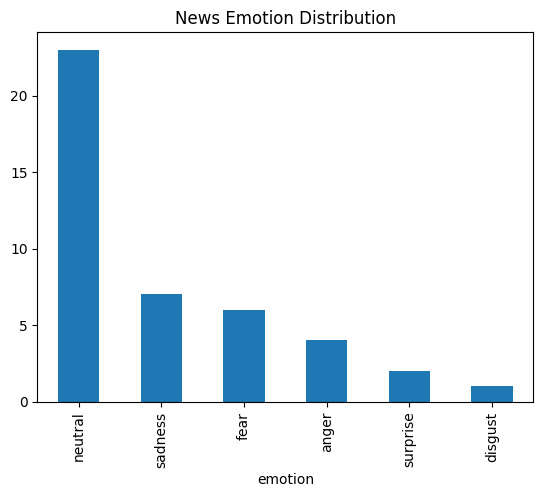

In [24]:
# Emotion distribution news
news_df["emotion"].value_counts().plot(kind="bar", title="News Emotion Distribution")


<Axes: title={'center': 'Reddit Sentiment Labels'}, xlabel='sentiment_label'>

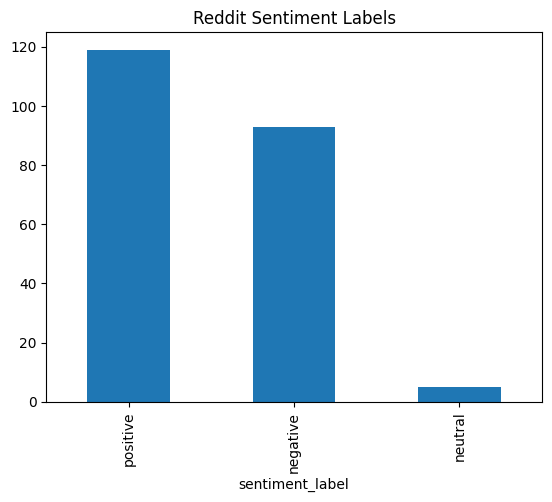

In [25]:
# Emotion distribbution (reddit)
reddit_df["sentiment_label"].value_counts().plot(kind="bar", title="Reddit Sentiment Labels")


<Axes: title={'center': 'Average Reddit Sentiment Over Time'}, xlabel='date'>

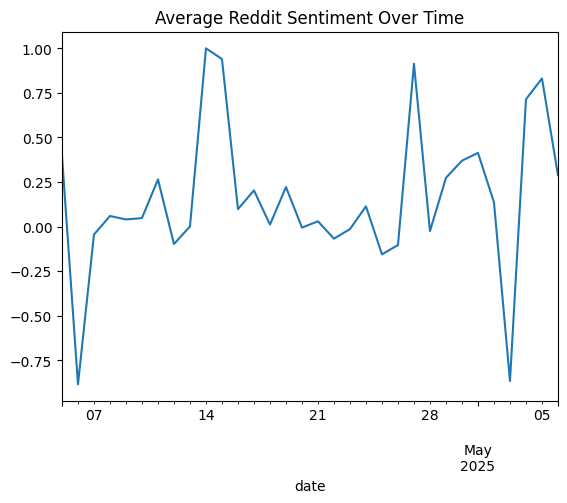

In [26]:
# Sentiment Over Time
reddit_df["date"] = pd.to_datetime(reddit_df["date"])
daily_sentiment = reddit_df.groupby("date")["sentiment_thread"].mean()
daily_sentiment.plot(title="Average Reddit Sentiment Over Time")


Text(0.5, 1.0, 'News vs Reddit Sentiment Comparison')

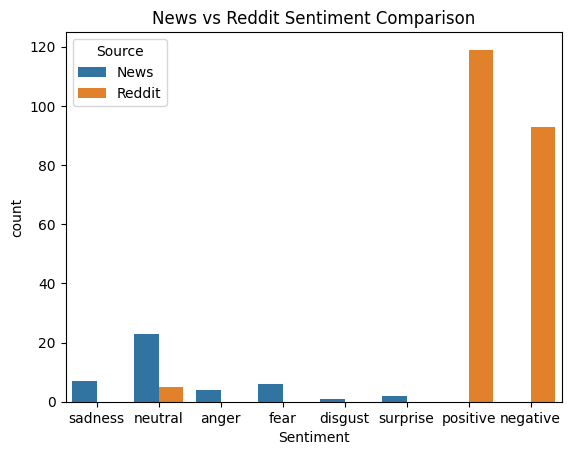

In [27]:
# Side-by-Side Comparison (News vs Reddit)
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    "Source": ["News"] * len(news_df) + ["Reddit"] * len(reddit_df),
    "Sentiment": pd.concat([news_df["emotion"], reddit_df["sentiment_label"]])
})
sns.countplot(data=data, x="Sentiment", hue="Source")
plt.title("News vs Reddit Sentiment Comparison")
